## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1. Data from our lives
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

I'm taking daily life example of predicting a student's final GPA in a course. In the context of education, regression models can be used to estimate a student's final GPA based on various predictors.

1)** Midterm Exam Scores:** The scores a student achieves on their midterm exams are often a good predictor of their final GPA. Higher midterm scores can indicate better overall performance.

2) **Homework and Assignment Completion:** The percentage of homework and assignments completed and submitted on time can be a strong predictor. Consistent completion of assignments is associated with better final GPA.

3) **Attendance:** The number of classes a student attends or their attendance rate can be used as a predictor. Better attendance is often correlated with higher GPA.

4) **Study Hours**: The number of hours a student spends studying outside of a class can be an important predictor. More study time is generally associated with better understanding and performance.

5) **Participation in Class**: Active class participation, such as asking questions, contributing to discussions, or engaging with the material, can be a predictor of final GPA.

6)**Course Credits**: When a student enrolls in a course, it is typically assigned a certain number of credits that measure the course's workload and significance. The more credits a course has the more impact it will have on a student's GPA.


## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [ ]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


This code imports Pandas library and reads a CSV file named 'auto_imports1.csv' into a Pandas DataFrame called 'df.' It then displays the first few rows of the DataFrame to provide an initial view of the data's structure.

## 2. Data

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [ ]:
##your code here
import pandas as pd
data = pd.read_csv('auto_imports1.csv')

data_types = data.dtypes
print(data_types)










fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object



I used the Pandas library to read data from a CSV file named 'auto_imports1.csv' and store it in a DataFrame called 'data'. And then retrieves and prints the data types of each column in the DataFrame, showing the data type like (int, float, object) for each column in the CSV file.

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [ ]:
## Your code here
import pandas as pd
df = pd.read_csv('auto_imports1.csv')

# Replace '?' with None
df = df.replace('?', None)

# Convert the specified columns to float64
columns_to_convert = ['bore', 'stroke', 'horse_power', 'peak_rpm']
df[columns_to_convert] = df[columns_to_convert].astype(float)

first I imported the Pandas library and read a CSV file named 'auto_imports1.csv' into a DataFrame called 'df.'

Then replaced any occurrences of '?' with 'None' in the DataFrame, effectively converting missing or invalid values to a more appropriate representation.

Next, it selected specific columns like('bore', 'stroke', 'horse_power', 'peak_rpm') and converts their data types to float ensuring that these columns contain numerical data in floating-point format.

Overall, this code prepares the data in the DataFrame for further analysis by handling missing values and ensuring data consistency in the specified columns.







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [ ]:

# Drop the specified columns
columns_to_drop = ['body', 'engine_type', 'cylinders']
df2 = df.drop(columns=columns_to_drop)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   wheel_base   201 non-null    float64
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   heights      201 non-null    float64
 5   curb_weight  201 non-null    int64  
 6   engine_size  201 non-null    int64  
 7   bore         197 non-null    float64
 8   stroke       197 non-null    float64
 9   comprassion  201 non-null    float64
 10  horse_power  199 non-null    float64
 11  peak_rpm     199 non-null    float64
 12  city_mpg     201 non-null    int64  
 13  highway_mpg  201 non-null    int64  
 14  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 23.7+ KB


This code first creates a list of column names like ('body,' 'engine_type,' and 'cylinders') to be dropped from a DataFrame. It then creates a new DataFrame 'df2' by removing these columns from the original DataFrame 'df.' Finally, it displays helpful information about 'df2,' including data types and non-null values, providing insights into the DataFrame's structure after column removal.

In [ ]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


df2.head() displays the first five rows of the DataFrame 'df2,' providing a preview of the data.

### Drop all nan values

In [ ]:
df2 = df2.dropna()


This piece of code removes rows with missing (NaN) values from the DataFrame 'df2,' effectively eliminating incomplete or undefined data.

In [ ]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64


Code checks for missing values in the DataFrame 'df2' using df2.isnull(), which creates a Boolean DataFrame with True for missing values. sum() is used to count the True values in each column, giving the number of missing values for each column. It provides an overview of missing data in 'df2.'

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 24.4+ KB


df2.info() provides a summary of the DataFrame 'df2,' including details like the number of non-null values in each column, the data types of columns, and the memory usage.

### Get dummy variables for fuel_type within df2 drop first level

In [ ]:
## Your code goes here
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


Above this code snippet that creates dummy variables for the 'fuel_type' column in the 'df2' DataFrame using one-hot encoding. It also drops the first category to avoid multicollinearity. Finally, the code displays the first few rows of 'df2' DataFrame with the newly created dummy variables using the 'df2.head()' function.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [ ]:
df2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


'df2.info()' provides essential information about the DataFrame 'df2,' including data types, the number of non-null values in each column, and memory usage.

In [ ]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000



df2.describe() provides a comprehensive summary of the numerical columns in the DataFrame 'df2'. It includes various statistics like count, mean, standard deviation, minimum, and maximum values, which offer insights into the central tendencies and spread of the data. It's a useful tool to get an overview of the data and to identify any potential outliers

In [ ]:
df2.isnull().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

df2.isnull().sum() counts the number of missing (NaN) values in each column of the DataFrame 'df2' and provides the count of missing values for each column, effectively revealing the extent of missing data.

In [ ]:
missing_data = df2.isnull()
missing_data

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



missing_data is a DataFrame created by applying the isnull() method to the DataFrame 'df2.' It contains Boolean values, where each True indicates a missing value (NaN) in the corresponding cell of 'df2.' This DataFrame is useful for identifying and working with missing data in 'df2.' We got total of 195 rows and 15 columns.

<Axes: xlabel='fuel_type_gas', ylabel='count'>

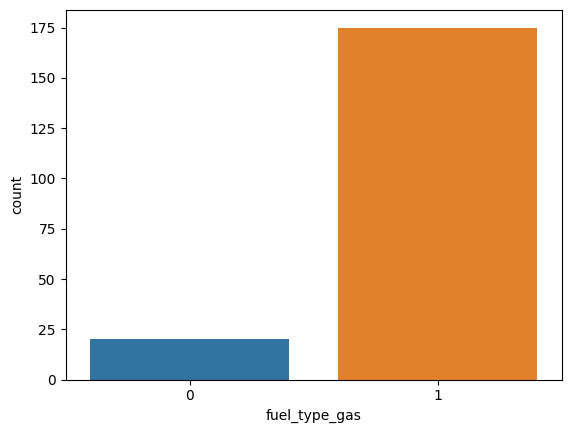

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='fuel_type_gas', data = df2, )




The code snippet uses the Seaborn library to create a countplot that visualizes the distribution of values in the 'fuel_type_gas' column of the 'df2' DataFrame. The x-axis of the plot represents the 'fuel_type_gas' values, and the y-axis represents the count of their occurrences. The countplot is useful for understanding the frequency or distribution of categorical variables.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


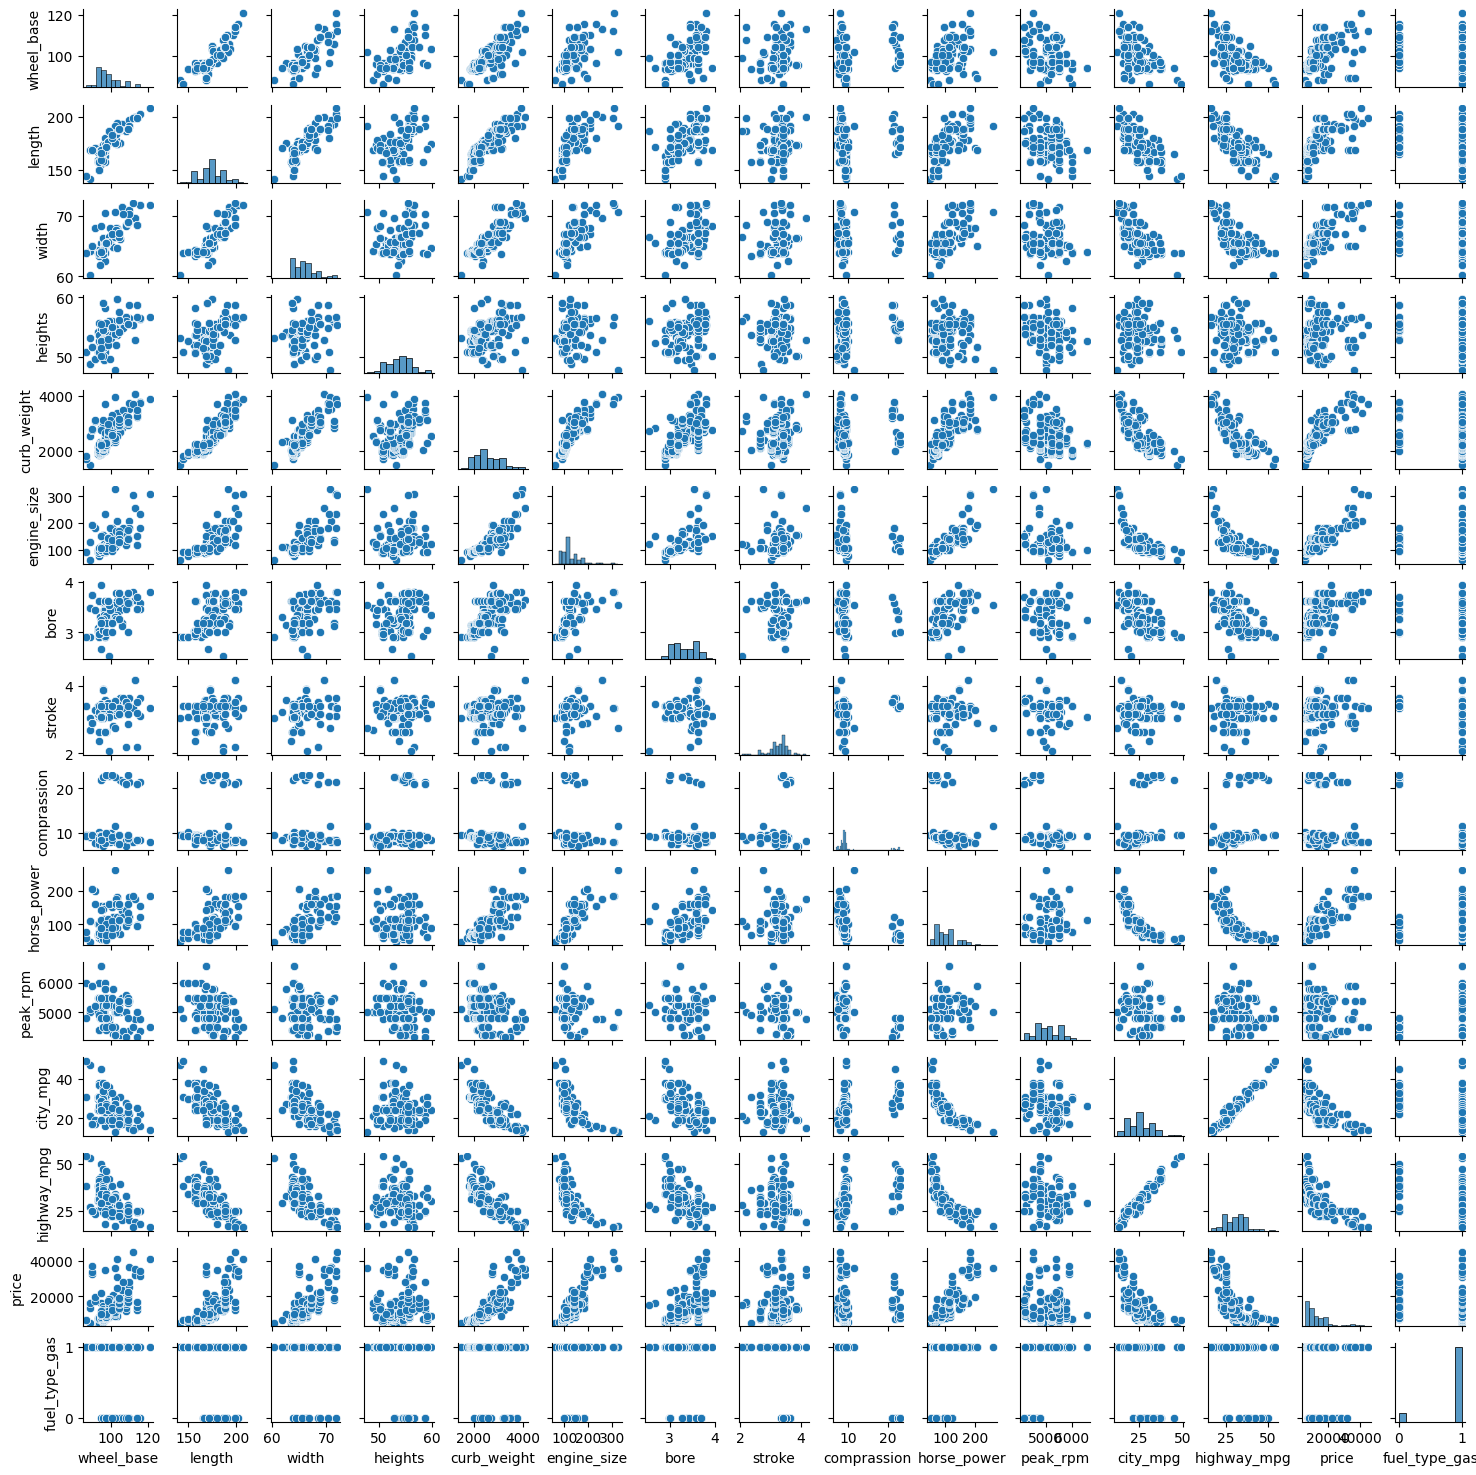

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df2,size=1)
plt.show()

This code uses Seaborn to create a pairplot, which is a grid of scatterplots comparing numerical variables in the DataFrame 'df2' to visualize potential relationships and patterns. The 'size' parameter controls the size of the plots. Once generated, plt.show() is used to display the pairplot for data exploration and analysis

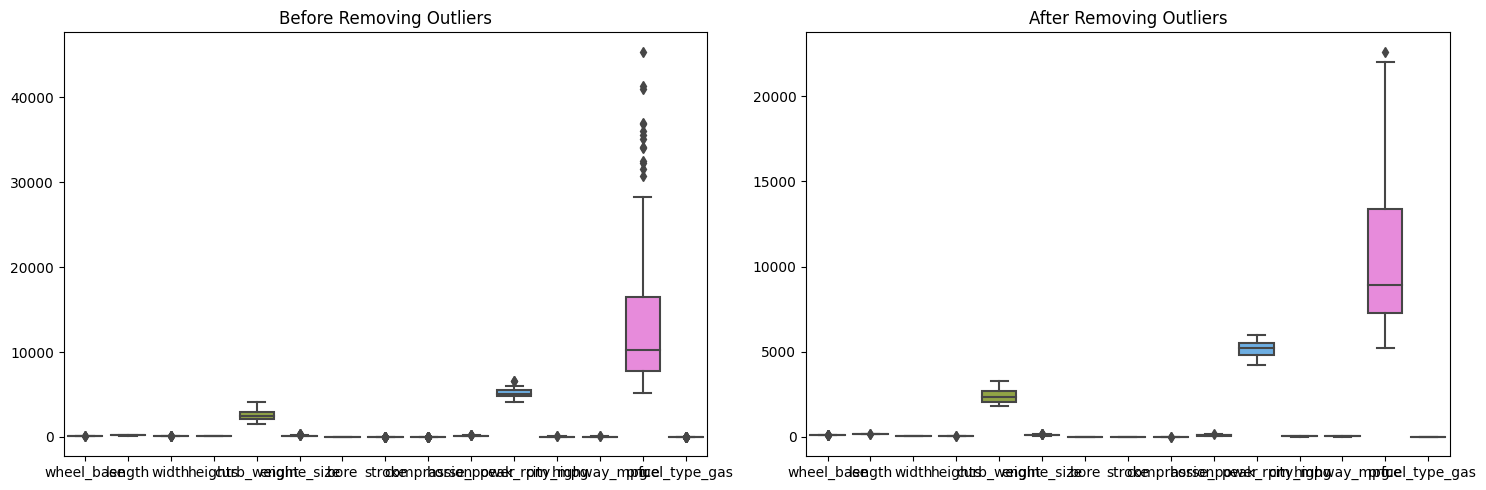

In [ ]:
outlier_threshold = 1.5
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df2)
plt.title('Before Removing Outliers')
for column in df2.columns:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
plt.subplot(1, 2, 2)
sns.boxplot(data=df2)
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

To remove outliers from the DataFrame 'df2', this code uses the Interquartile Range (IQR) method to calculate lower and upper bounds for potential outliers. It then filters 'df2' to retain only the data within these bounds, effectively removing outliers.

In addition, the code sets an 'outlier_threshold' to 1.5 and creates two side-by-side boxplots to display the data distribution before and after outlier removal. This helps assess the impact of outlier removal on the dataset's distribution, improving data quality and ensuring that the analysis is not unduly influenced by extreme values.

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [ ]:


y = df2['price']
x = df2.drop(columns=['price'], axis=1)
x=sm.add_constant(x)
model1=sm.OLS(y,x).fit()
print(model1.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.26e-36
Time:                        02:06:36   Log-Likelihood:                -1200.9
No. Observations:                 134   AIC:                             2430.
Df Residuals:                     120   BIC:                             2470.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
wheel_base      247.7942     87.398      2.835


This code performs linear regression to predict 'price' in DataFrame 'df2' using other columns as features. It first prepares the data, adds a constant term, fits the regression model, and then displays a summary with key statistics like coefficients and goodness-of-fit measures, providing insights into the predictive relationship between the variables.

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

**Interpret** :The intercept in a linear regression model represents the predicted value of the dependent variable when all independent variables are set to zero.


**Statistically Significant Variables**:As per standard practice in regression analysis, the statistical significance of variables is usually evaluated by examining their corresponding p-values in the regression summary. Typically, a low p-value (often below 0.05) is indicative of a statistically significant variable

**Variance**:The variance of the model,often referred to as the Residual Standard Error (RSE),is not explicity provided in summarry output. A smaller residual variance indicates that the model fits the data better.

**The coefficient of determination (R-squared)** measures the proportion of the variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1. A higher R-squared (closer to 1) indicates that the independent variables explain a larger portion of the variance in the dependent variable. The R-squared is
 0.807, it means that 80% of the variability in 'price' is explained by the model.

**F-Statistics**:The F-statistic, also known as the F-test, It is used in regression analysis.
The joint significance of a group of independent variables in explaining the variation in the dependent variable.
 F-statistic Value: The F-statistic is a ratio of two measures of variance:
 The explained variance: It measures how much of the total variance in the dependent variable is explained by the model.
 The unexplained variance: It measures how much of the variance in the dependent variable remains unexplained by the model.
 F-statistic: 38.55

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow.

In [ ]:
X = df2.drop(columns=['price'])
y = df2['price']

X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
# Drop non-significant variables at 90% confidence level
significant_vars = model1.pvalues[model1.pvalues <= 0.1]
X2 = X[significant_vars.index]

model2 = sm.OLS(y, X2).fit()
print(model2.summary())





                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              831.9
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                    2.72e-96
Time:                        02:06:36   Log-Likelihood:                         -1207.8
No. Observations:                 134   AIC:                                      2426.
Df Residuals:                     129   BIC:                                      2440.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

The code creates two linear regression models: 'model1' and 'model2'. The first model uses all independent variables to predict the 'price' and then assesses their significance. The non-significant variables (p-value > 0.1) are dropped from the model. The second model, 'model2', is built using only the statistically significant variables identified in 'model1' (p-value <= 0.1). Finally, 'model2.summary()' displays the summary of the refined model, providing insights into the relationship between the selected variables and 'price', while also simplifying the model by excluding less significant predictors.

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value.
5. What is the F-statistics used for? How do you interpret it for this model?

**Intercept Interpretation**: The intercept represents the predicted 'price' when all independent variables are set to zero.

**Statistically Significant Variables**: The number of statistically significant variables can be determined by examining the p-values in the regression summary. Variables with p-values less than 0.1 are considered statistically significant in model.


**Variance** The variance of the model, or residual variance, represents the amount of unexplained variability in the 'price' that the model couldn't account for. A smaller residual variance indicates a better fit of the model to the data.


**Coefficient of Determination (R-squared)**: The coefficient of determination (R-squared) measures the proportion of the variance in the 'price' explained by the selected independent variables. If R-squared is 0.970 it means that 97% of the variability in 'price' can be explained by the model.

**F-statistic** The F-statistic, also known as the F-test, It is used in regression analysis.
The joint significance of a group of independent variables in explaining the variation in the dependent variable.
F-statistic Value: The F-statistic is a ratio of two measures of variance:
The explained variance: It measures how much of the total variance in the dependent variable is explained by the model.
The unexplained variance: It measures how much of the variance in the dependent variable remains unexplained by the model.
F-statistic: 831.9
Prob (F-statistic):2.72e-96

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [ ]:
##your code goes here
model1=sm.OLS(y,X).fit()
model2=sm.OLS(y,X2).fit()
model_result=anova_lm(model2,model1)
print(model_result)


   df_resid           ssr  df_diff       ss_diff         F   Pr(>F)
0     129.0  5.290147e+08      0.0           NaN       NaN      NaN
1     120.0  4.776646e+08      9.0  5.135013e+07  1.433367  0.18133


This code performs an analysis of variance (ANOVA) between two linear regression models, 'model1' and 'model2,' to assess if the inclusion of additional variables in 'model2' significantly improves its predictive performance compared to 'model1.' The ANOVA table contains statistics like F-statistics (1.433367) and p-values(0.18133), where a small p-value suggests 'model2' is a statistically significant improvement over 'model1.'

**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

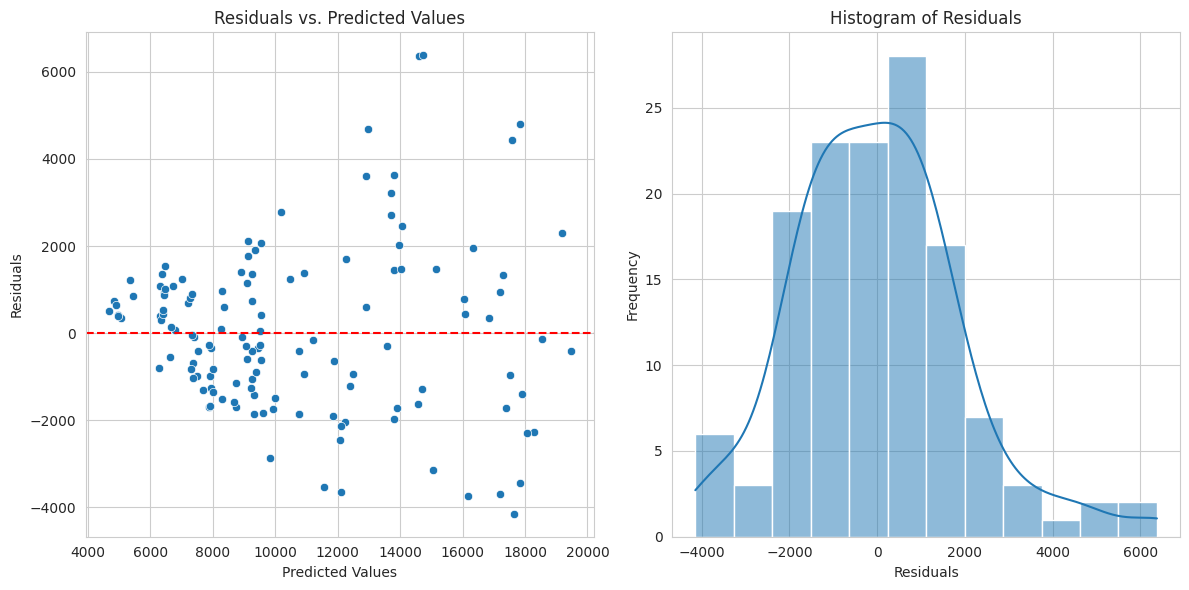

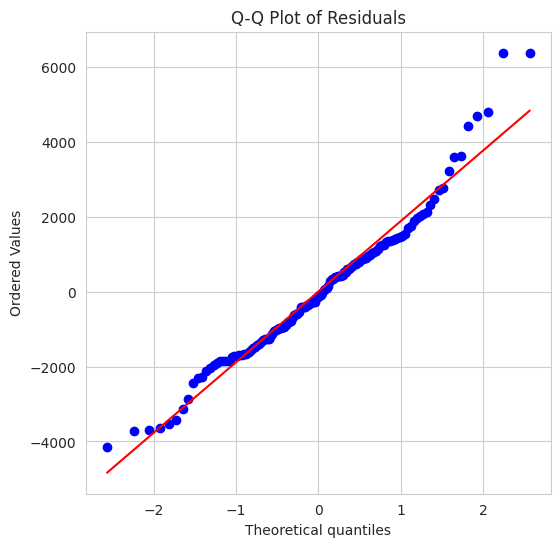

,Variable,VIF
0,wheel_base,5.045952
1,length,6.860770
2,width,4.658280
3,heights,2.053550
4,curb_weight,10.454596
5,engine_size,9.463799
6,bore,3.068054
7,stroke,1.857840
8,comprassion,1.702470
9,horse_power,7.476471


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import probplot

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate residuals
residuals = model1.resid

# Calculate predicted values
fitted = model1.fittedvalues

# 1. Linearity and 3. Homoscedasticity
# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 2. Independence
# Durbin-Watson statistic is in the model summary (close to 2 indicates independence)

# 4. Normality of Residuals
# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 5. No Multicollinearity
# Calculate Variance Inflation Factor for each predictor
vif_data_1 = pd.DataFrame()
vif_data_1["Variable"] = X.columns
vif_data_1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data_1

In this code, several diagnostic plots and checks are conducted for a linear regression model ('model1'):

Linearity and Homoscedasticity: The code creates a scatter plot of residuals vs. predicted values to assess linearity and homoscedasticity. It checks whether the residuals are evenly spread around zero and have a consistent spread across different predicted values.

Independence: The Durbin-Watson statistic, mentioned in the model summary, is used to assess the independence of residuals. A value close to 2 indicates independence.

Normality of Residuals: The code plots a histogram and a Q-Q (quantile-quantile) plot of the residuals to check if they follow a normal distribution. A bell-shaped histogram and a Q-Q plot closely following a straight line suggest normality.

No Multicollinearity: The code calculates the Variance Inflation Factor (VIF) for each predictor to assess multicollinearity. VIF values above a certain threshold  indicate multicollinearity among the independent variables, potentially affecting model interpretability and performance.

**5. Is there Multicollinearity in your data?**

In [ ]:
independent_variables = df2.drop(columns=['price'])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            VIF
0      5.045952
1      6.860770
2      4.658280
3      2.053550
4     10.454596
5      9.463799
6      3.068054
7      1.857840
8      1.702470
9      7.476471
10     1.754565
11    21.713809
12    19.347037
13  6914.197169


In [ ]:
independent_variables = df2.drop(columns=['price'])
vif2 = pd.DataFrame()
vif2["Variable"] = X2.columns
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif2)
res=vif2[vif2['VIF']>5]
res

            VIF
0      5.045952
1      6.860770
2      4.658280
3      2.053550
4     10.454596
5      9.463799
6      3.068054
7      1.857840
8      1.702470
9      7.476471
10     1.754565
11    21.713809
12    19.347037
13  6914.197169


,VIF
0,5.045952
1,6.860770
4,10.454596
5,9.463799
9,7.476471
11,21.713809
12,19.347037
13,6914.197169


A common rule if the VIF value for a variable is greater than 10, it may indicate multicollinearity.
# #Removing the dependent variable
independent_variables = df2.drop(columns=['price'])
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif = pd.DataFrame()
# List Comprehension Getting value of VIF one after other.
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
Four VIF Varible values are Greater than 10
It means it is multicollinearity.